# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

settings = {"units": "imperial", "appid": api_key}

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

591

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
city=[]


print('Beggining Data Retrieval')
print('--------------------------------')
for x in range(len(cities)):
    try:
        print(f'Processing Record {x+1} of {len(cities)} | {cities[x]}')
        city.append(owm.get_current(cities[x], **settings)['name'])
        cloudiness.append(owm.get_current(cities[x], **settings)['clouds']['all'])
        date.append(owm.get_current(cities[x], **settings)['dt'])
        country.append(owm.get_current(cities[x], **settings)['sys']['country'])
        humidity.append(owm.get_current(cities[x], **settings)['main']['humidity'])
        max_temp.append(owm.get_current(cities[x], **settings)['main']['temp_max'])
        lat.append(owm.get_current(cities[x], **settings)['coord']['lat'])
        lng.append(owm.get_current(cities[x], **settings)['coord']['lon'])
        wind_speed.append(owm.get_current(cities[x], **settings)['wind']['speed'])
       
    except:
        print('City not found. Skipping...')

print('--------------------------------')
print('Data Retrieval Complete')
print('--------------------------------')

Beggining Data Retrieval
--------------------------------
Processing Record 1 of 591 | hobart
Processing Record 2 of 591 | barentsburg
City not found. Skipping...
Processing Record 3 of 591 | lagos
Processing Record 4 of 591 | saint-augustin
Processing Record 5 of 591 | airai
Processing Record 6 of 591 | kamenskoye
City not found. Skipping...
Processing Record 7 of 591 | mataura
Processing Record 8 of 591 | ribeira grande
Processing Record 9 of 591 | new norfolk
Processing Record 10 of 591 | albany
Processing Record 11 of 591 | rikitea
Processing Record 12 of 591 | hermanus
Processing Record 13 of 591 | ponta do sol
Processing Record 14 of 591 | ganj muradabad
Processing Record 15 of 591 | puerto ayora
Processing Record 16 of 591 | hastings
Processing Record 17 of 591 | saurimo
Processing Record 18 of 591 | naze
Processing Record 19 of 591 | hilo
Processing Record 20 of 591 | upernavik
Processing Record 21 of 591 | dikson
Processing Record 22 of 591 | qaanaaq
Processing Record 23 of 59

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_df = pd.DataFrame({'City': city,'Cloudiness': cloudiness,'Country': country,'Date': date,'Humidity':humidity,'Lat': lat,'Lng': lng,'Max Temp':max_temp,'Wind Speed': wind_speed})
weather_df.to_csv("weather.csv",index=False)

In [5]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hobart,40,AU,1573960541,33,-42.88,147.33,61.00,10.29
1,Lagos,20,NG,1573960543,94,6.46,3.39,80.60,2.24
2,Saint-Augustin,5,CA,1573960544,84,45.63,-73.98,14.00,2.08
3,Airai,2,TL,1573960545,25,-8.93,125.41,87.51,9.17
4,Mataura,11,NZ,1573960546,63,-46.19,168.86,57.99,10.00


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

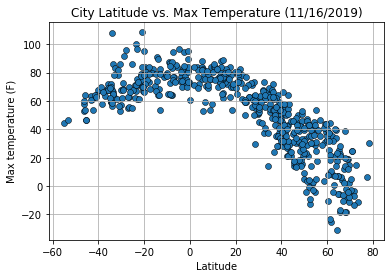

In [10]:
plt.scatter(weather_df['Lat'],weather_df['Max Temp'], linewidths=.5, edgecolors='black')
plt.ylabel('Max temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)
plt.title('City Latitude vs. Max Temperature (11/16/2019)')
plt.savefig("lat vs temp.png")

#### Latitude vs. Humidity Plot

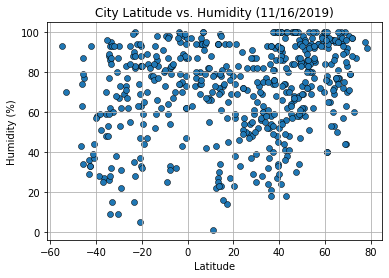

In [11]:
plt.scatter(weather_df['Lat'],weather_df['Humidity'], linewidths=.5, edgecolors='black')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)
plt.title('City Latitude vs. Humidity (11/16/2019)')
plt.savefig("lat vs humidity.png")

#### Latitude vs. Cloudiness Plot

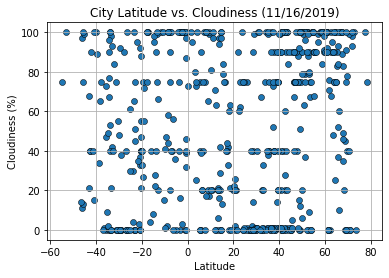

In [12]:
plt.scatter(weather_df['Lat'],weather_df['Cloudiness'], linewidths=.5, edgecolors='black')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)
plt.title('City Latitude vs. Cloudiness (11/16/2019)')
plt.savefig("lat vs cloudiness.png")

#### Latitude vs. Wind Speed Plot

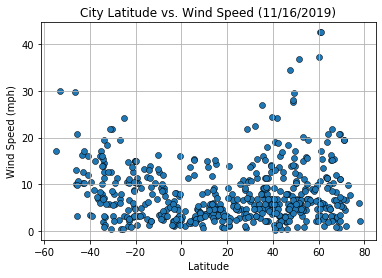

In [13]:
plt.scatter(weather_df['Lat'],weather_df['Wind Speed'], linewidths=.5, edgecolors='black')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)
plt.title('City Latitude vs. Wind Speed (11/16/2019)')
plt.savefig("lat vs winds.png")

## Observations
#### 1. Latitude affects max temperature drastically today.
#### 2. Latitude doesnt affect Wind Speed
#### 3. All cities tested South of 25 degrees lattiude have been warmer than freezing (32F) today.
